In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab as pl
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('followers.csv')

In [3]:
data.columns.values


array(['Unnamed: 0', 'data_properties.twitter_followers',
       'data_properties.facebook_followers',
       'data_properties.instagram_followers', 'data_properties.ppp_country'], dtype=object)

In [4]:
data = data.drop(['Unnamed: 0'],axis=1)

In [5]:
collection = data

In [6]:
data.head()

,data_properties.twitter_followers,data_properties.facebook_followers,data_properties.instagram_followers,data_properties.ppp_country
0,57518,47636,10836,42609
1,161302,0,0,57467
2,151333,2509088,574057,42609
3,52980,46268,4560,42609
4,158313,330064,75019,57467


In [7]:
data = data.replace(0,np.nan)
data = data.dropna(how='any',axis=0)

Text(0.5,0,'fb')

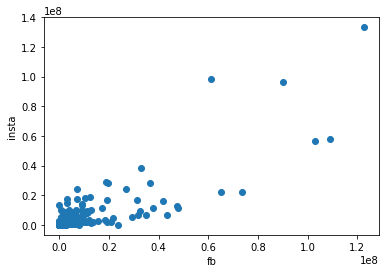

In [8]:
#check for outliers
fig,ax = plt.subplots()
ax.scatter(x=data['data_properties.facebook_followers'],
          y=data['data_properties.instagram_followers'])
plt.ylabel('insta')
plt.xlabel('fb')

In [9]:
graph_data = sorted(data['data_properties.instagram_followers'])

In [10]:
fit = stats.norm.pdf(graph_data,np.mean(graph_data),np.std(graph_data))

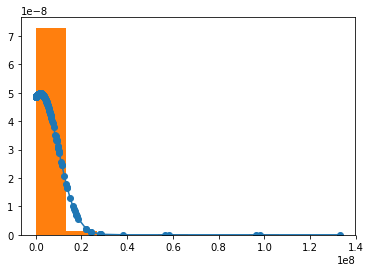

In [11]:
pl.plot(graph_data,fit,'-o')
pl.hist(graph_data,normed=True)
pl.show()

In [12]:
instagram_followers = np.log1p(graph_data)

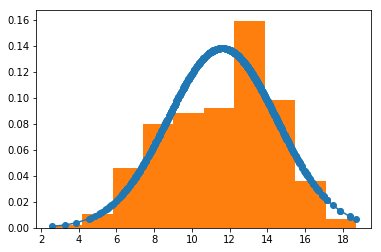

In [13]:
fit = stats.norm.pdf(instagram_followers,np.mean(instagram_followers),np.std(instagram_followers))
pl.plot(instagram_followers,fit,'-o')
pl.hist(instagram_followers,normed=True)
pl.show()

In [14]:
data.columns

Index(['data_properties.twitter_followers',
       'data_properties.facebook_followers',
       'data_properties.instagram_followers', 'data_properties.ppp_country'],
      dtype='object')

In [15]:
data['data_properties.instagram_followers'] = np.log1p(data['data_properties.instagram_followers'])
#to reverse back np.expm1(data['data_properties.instagram_followers'])

In [16]:
data.head()

,data_properties.twitter_followers,data_properties.facebook_followers,data_properties.instagram_followers,data_properties.ppp_country
0,57518.0,47636.0,9.290721,42609
2,151333.0,2509088.0,13.260486,42609
3,52980.0,46268.0,8.425297,42609
4,158313.0,330064.0,11.225510,57467
5,155375.0,372754.0,11.123757,57467


In [49]:
Y = data['data_properties.instagram_followers']

In [50]:
X = data.drop('data_properties.instagram_followers',1)

In [35]:
n_train = 565

In [59]:
x_train = np.array(X['data_properties.facebook_followers'][:n_train])
y_train = np.array(Y[:n_train])
x_test = np.array(X[n_train:])
y_test = np.array(Y[n_train:])

In [61]:
from sklearn.isotonic import IsotonicRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [60]:
iso = IsotonicRegression()
model = iso.fit_transform(x_train,y_train)

In [62]:
lr = LinearRegression()
lr.fit(x_train[:, np.newaxis], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.collections import LineCollection

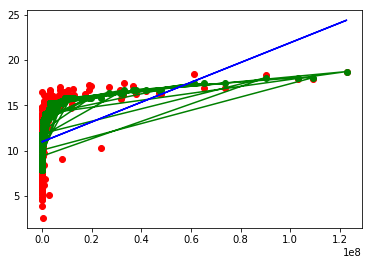

In [67]:
fig = plt.figure()
plt.plot(x_train, y_train, 'r.', markersize=12)
plt.plot(x_train, model, 'g.-', markersize=12)
plt.plot(x_train, lr.predict(x_train[:, np.newaxis]), 'b-')